# Predicting the bitcoin priceb

In this notebook we predict the bitcoin (BTC) price over the period 2021-01-01 to 2024-12-13. We use a linear regression model to make preduciton of bitcoin prices with an accuracy of 99% in 2024. It demostrate than simple model are sometimes best performing that complex ones using deep learning techniques. <br>

**Lesson learned:** In AI projects, it's importnat to test different models to find the best one for your application and dataset

In [41]:
import pandas as pd
import numpy as np
import datetime
import math

from docutils.nodes import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, WeekdayLocator
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [2]:
# Reads the dataset containing the bitcoin prices between 2021-01-01 and until 2024-12-13
prices_btc = pd.read_csv("bitcoin_2021_2024.csv")
prices_btc

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-12-13,2024-12-14,100068.000000,101818.000000,99295.320000,101371.000000,1.098668e+11,1.988907e+12
1,2024-12-12,2024-12-13,101062.000000,102497.000000,99422.230000,100041.000000,1.190551e+11,1.994228e+12
2,2024-12-11,2024-12-12,96716.030000,101825.000000,95777.210000,101074.000000,1.377922e+11,1.955908e+12
3,2024-12-10,2024-12-11,97052.540000,98128.020000,94371.100000,96628.010000,1.663730e+11,1.916908e+12
4,2024-12-09,2024-12-10,100968.000000,100968.000000,94947.980000,97422.430000,1.065316e+11,1.949270e+12
...,...,...,...,...,...,...,...,...
1438,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11
1439,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11
1440,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11
1441,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11


In [3]:
prices_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1443 non-null   object 
 1   End         1443 non-null   object 
 2   Open        1443 non-null   float64
 3   High        1443 non-null   float64
 4   Low         1443 non-null   float64
 5   Close       1443 non-null   float64
 6   Volume      1443 non-null   float64
 7   Market Cap  1443 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.3+ KB


In [4]:
# Changes type of columns Start and End from text to datetime
prices_btc['Start'] = pd.to_datetime(prices_btc['Start'], errors='coerce')
prices_btc['End'] = pd.to_datetime(prices_btc['End'], errors='coerce')
prices_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       1443 non-null   datetime64[ns]
 1   End         1443 non-null   datetime64[ns]
 2   Open        1443 non-null   float64       
 3   High        1443 non-null   float64       
 4   Low         1443 non-null   float64       
 5   Close       1443 non-null   float64       
 6   Volume      1443 non-null   float64       
 7   Market Cap  1443 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 90.3 KB


In [5]:
# Selects the features to use in the model: End (independent variable) and close (dependent variable)
closing_btc = prices_btc[['End', 'Close']]
closing_btc

,End,Close
0,2024-12-14,101371.000000
1,2024-12-13,100041.000000
2,2024-12-12,101074.000000
3,2024-12-11,96628.010000
4,2024-12-10,97422.430000
...,...,...
1438,2021-01-06,33965.160423
1439,2021-01-05,31973.832154
1440,2021-01-04,32877.607283
1441,2021-01-03,32093.264962


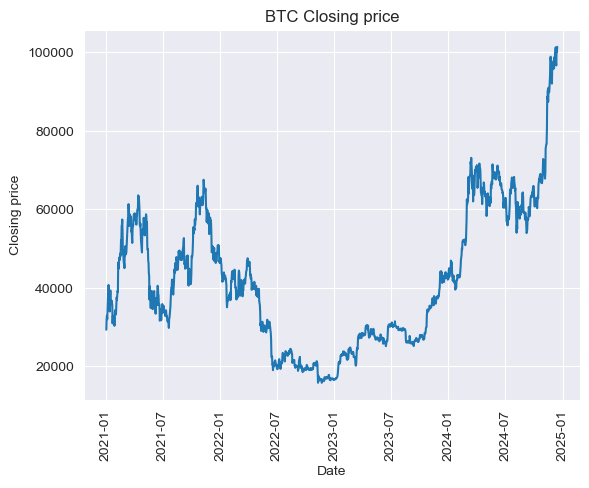

In [6]:
# Setting the End column as dataframe index and visualizing the data
closing_btc.set_index('End', inplace=True)

plt.plot(closing_btc.index, closing_btc.Close)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('BTC Closing price')
plt.show()

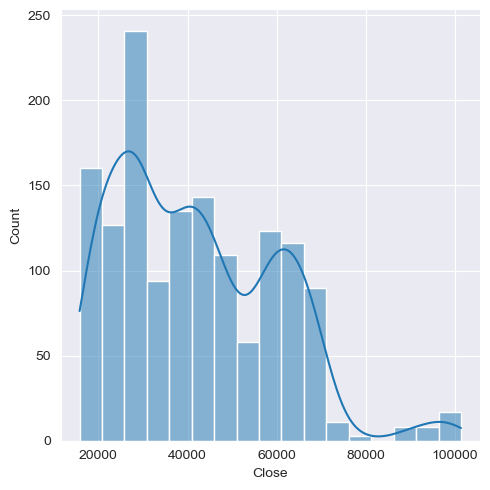

In [7]:
# Shows the BTC closing price distribution
sns.displot(closing_btc.Close, kde=True)

# Seasonal decompose

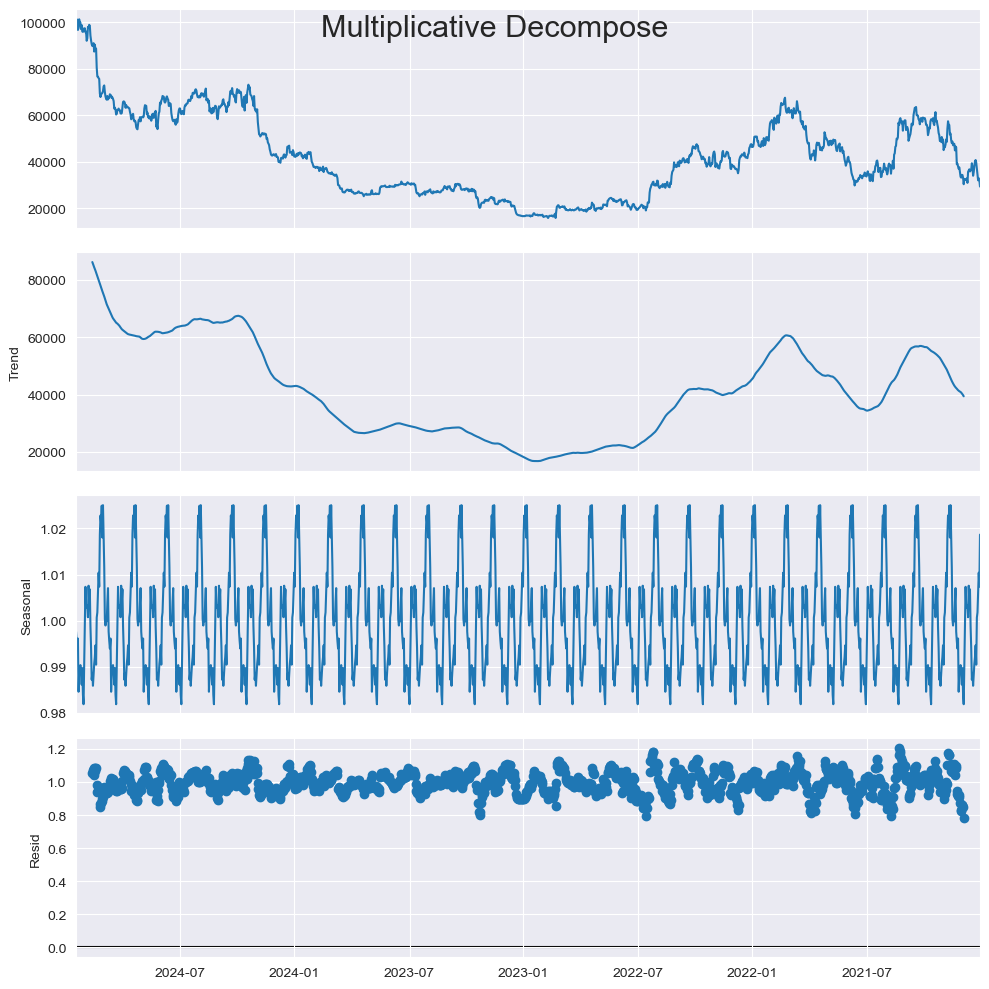

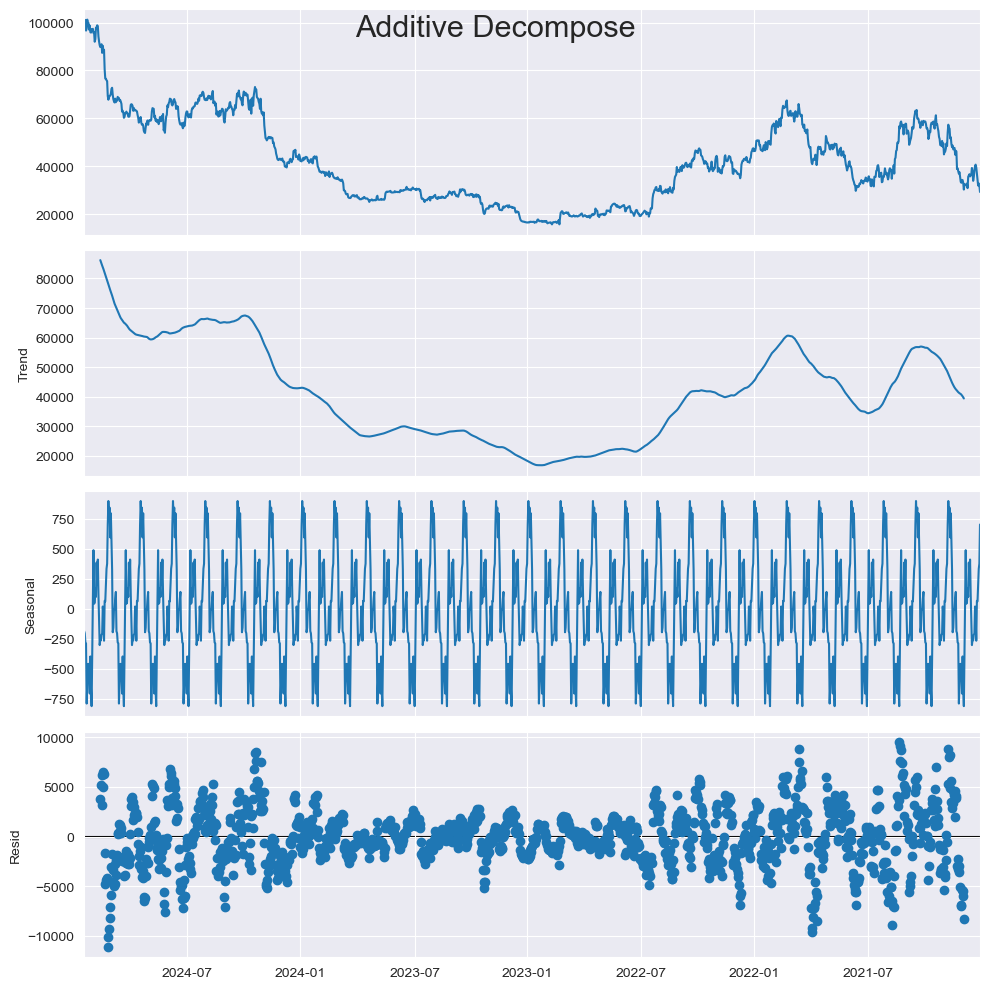

In [8]:
plt.rcParams.update({'figure.figsize': (10, 10)})
y = closing_btc['Close'].to_frame()

#Multiplicative decomposition
result_mult = seasonal_decompose(y, model='multiplicative', period=52)

#Aditive decomposition
result_add = seasonal_decompose(y, model='additive', period=52)

#Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
result_mult.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Feature extraction

In [9]:
closing_btc.reset_index(inplace=True)

In [10]:
# Decompose the End data into year, month, day, and day of the week
closing_btc.loc[:, 'year'] = closing_btc['End'].dt.year
closing_btc.loc[:, 'month'] = closing_btc['End'].dt.month
closing_btc.loc[:, 'day'] = closing_btc['End'].dt.day
closing_btc.loc[:, 'day_of_week'] = closing_btc['End'].dt.dayofweek
closing_btc.loc[:, 'weekday_name'] = closing_btc['End'].dt.day_name()

closing_btc

C:\Users\carlo\AppData\Local\Temp\ipykernel_28484\621979037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_btc.loc[:, 'year'] = closing_btc['End'].dt.year
C:\Users\carlo\AppData\Local\Temp\ipykernel_28484\621979037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_btc.loc[:, 'month'] = closing_btc['End'].dt.month
C:\Users\carlo\AppData\Local\Temp\ipykernel_28484\621979037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,End,Close,year,month,day,day_of_week,weekday_name
0,2024-12-14,101371.000000,2024,12,14,5,Saturday
1,2024-12-13,100041.000000,2024,12,13,4,Friday
2,2024-12-12,101074.000000,2024,12,12,3,Thursday
3,2024-12-11,96628.010000,2024,12,11,2,Wednesday
4,2024-12-10,97422.430000,2024,12,10,1,Tuesday
...,...,...,...,...,...,...,...
1438,2021-01-06,33965.160423,2021,1,6,2,Wednesday
1439,2021-01-05,31973.832154,2021,1,5,1,Tuesday
1440,2021-01-04,32877.607283,2021,1,4,0,Monday
1441,2021-01-03,32093.264962,2021,1,3,6,Sunday


In [11]:
# Visualizes the features
features = ['End', 'Close', 'year', 'month', 'day', 'day_of_week', 'weekday_name']
closing_btc_dates = closing_btc[features]

# Sets End column as the index column
closing_btc_dates.set_index('End', inplace=True)
closing_btc_dates

,Close,year,month,day,day_of_week,weekday_name
End,,,,,,
2024-12-14,101371.000000,2024,12,14,5,Saturday
2024-12-13,100041.000000,2024,12,13,4,Friday
2024-12-12,101074.000000,2024,12,12,3,Thursday
2024-12-11,96628.010000,2024,12,11,2,Wednesday
2024-12-10,97422.430000,2024,12,10,1,Tuesday
...,...,...,...,...,...,...
2021-01-06,33965.160423,2021,1,6,2,Wednesday
2021-01-05,31973.832154,2021,1,5,1,Tuesday
2021-01-04,32877.607283,2021,1,4,0,Monday


<Axes: xlabel='year', ylabel='Close'>

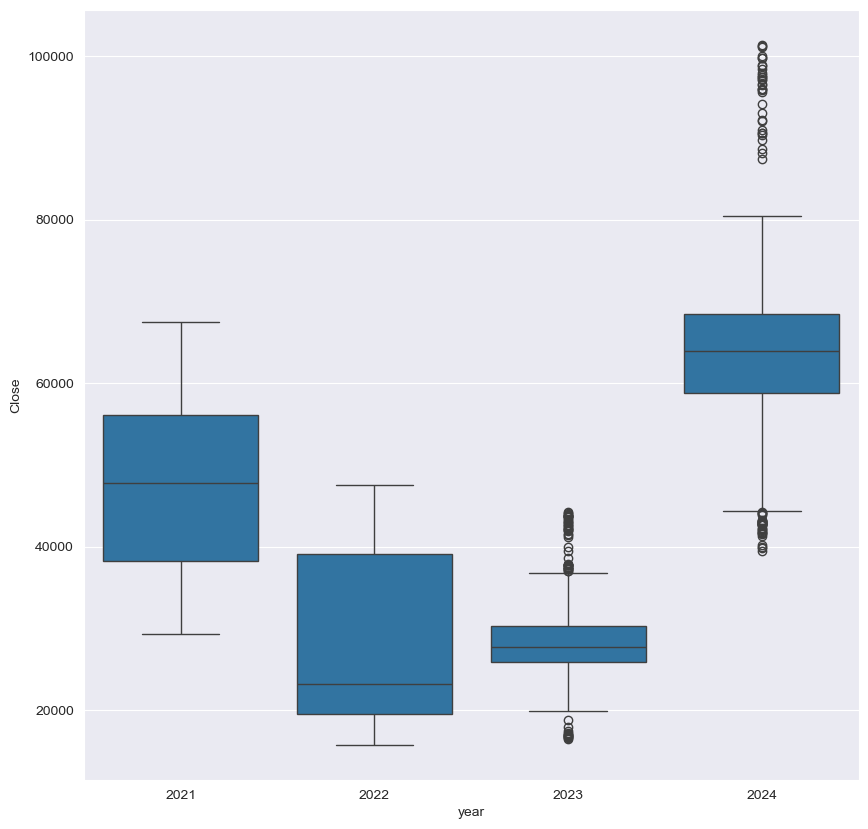

In [12]:
sns.boxplot(data=closing_btc_dates, x='year', y='Close')

<Axes: xlabel='month', ylabel='Close'>

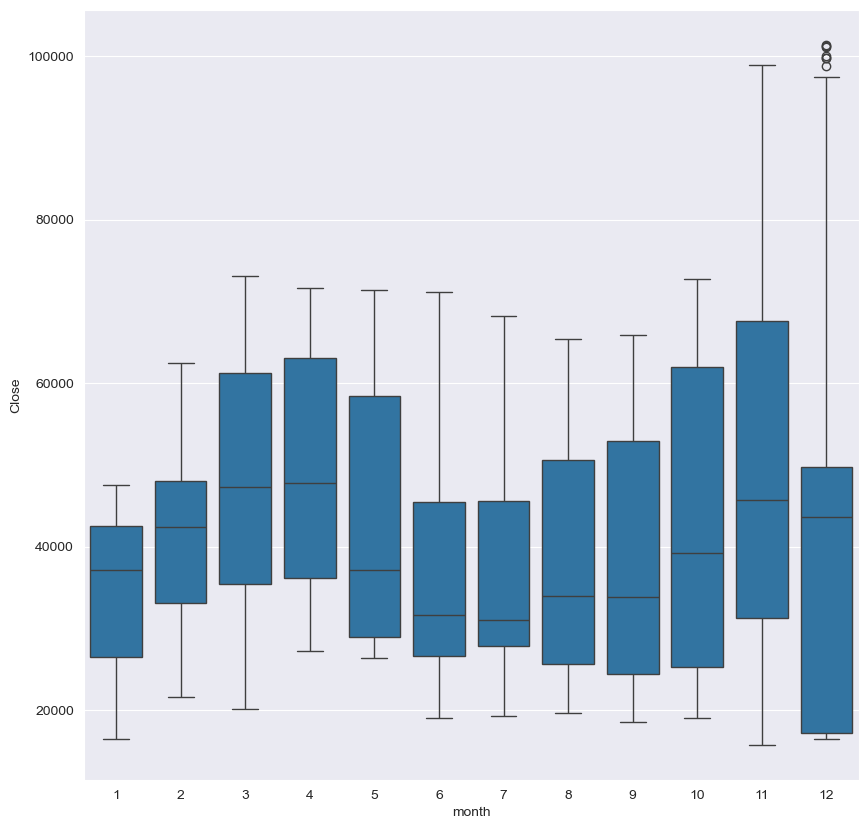

In [13]:
sns.boxplot(data=closing_btc_dates, x='month', y='Close')

<Axes: xlabel='day', ylabel='Close'>

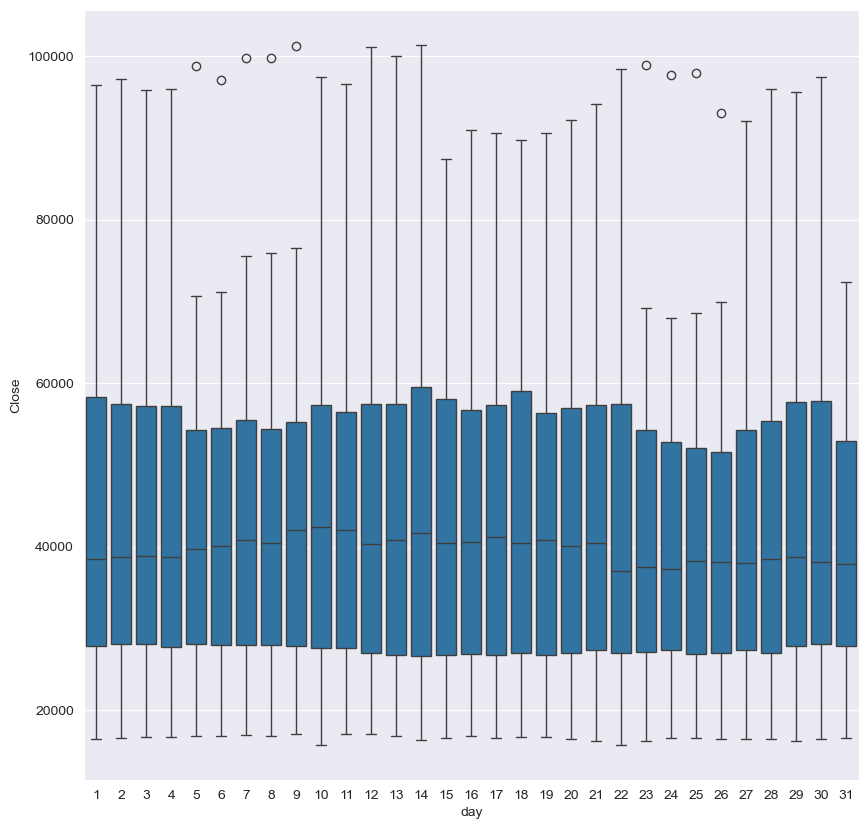

In [14]:
sns.boxplot(data=closing_btc_dates, x='day', y='Close')

<Axes: xlabel='day_of_week', ylabel='Close'>

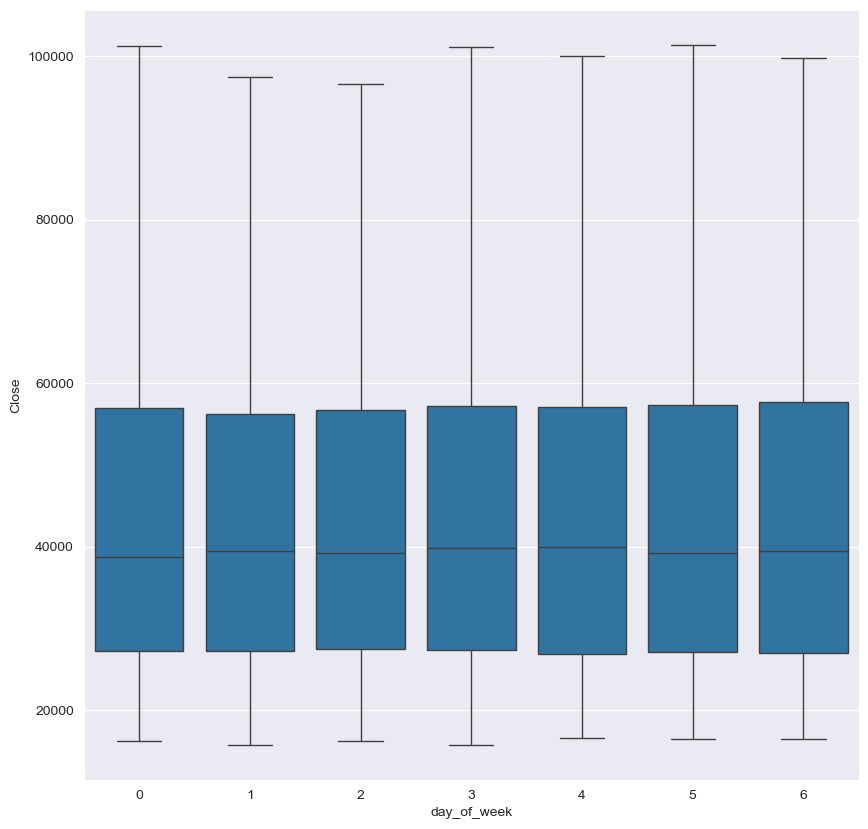

In [15]:
sns.boxplot(data=closing_btc_dates, x='day_of_week', y='Close')

# Time resamplingb

In [16]:
closing_btc_dates.iloc[:, :-1].resample(rule='YE').mean()

,Close,year,month,day,day_of_week
End,,,,,
2021-12-31,47411.761943,2021.0,6.541209,15.760989,3.000000
2022-12-31,28272.170202,2022.0,6.526027,15.720548,3.005479
2023-12-31,28779.092224,2023.0,6.526027,15.720548,3.008219
2024-12-31,64253.107278,2024.0,6.246418,15.404011,2.991404


Text(0.5, 1.0, 'BTC yearly mean closing - end of the year')

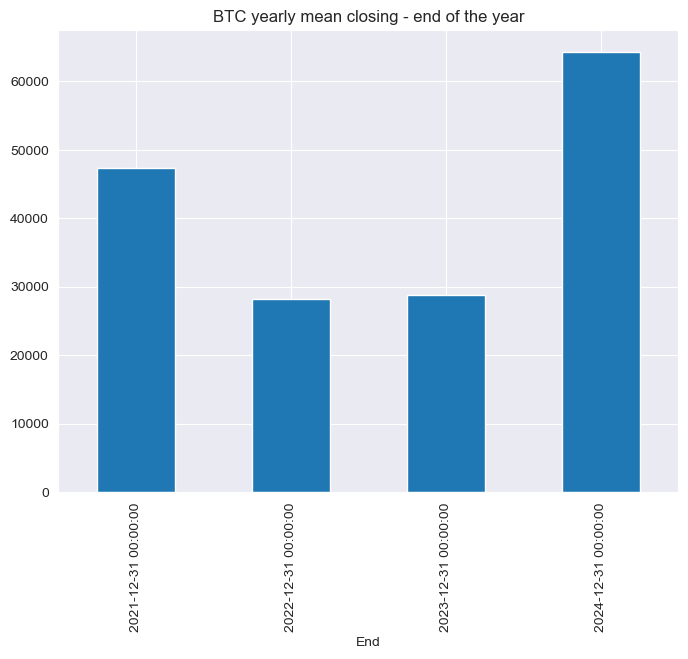

In [17]:
# year end
plt.rcParams['figure.figsize'] = (8, 6)
closing_btc_dates['Close'].resample('YE').mean().plot(kind='bar')
plt.title('BTC yearly mean closing - end of the year')

Text(0.5, 1.0, 'BTC yearly mean closing - beginning at the year')

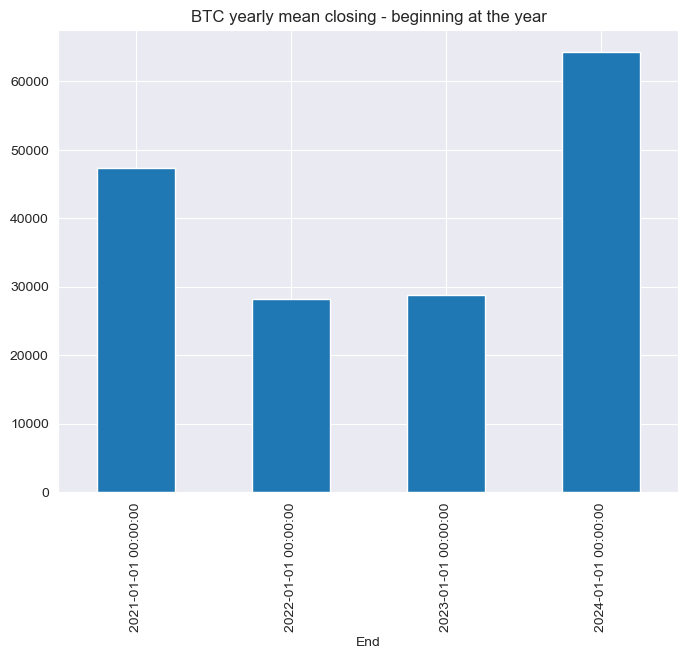

In [18]:
# Year beginning
plt.rcParams['figure.figsize'] = (8, 6)
closing_btc_dates['Close'].resample('YS').mean().plot(kind='bar')
plt.title('BTC yearly mean closing - beginning at the year')

Text(0.5, 1.0, 'BTC monthly mean closing')

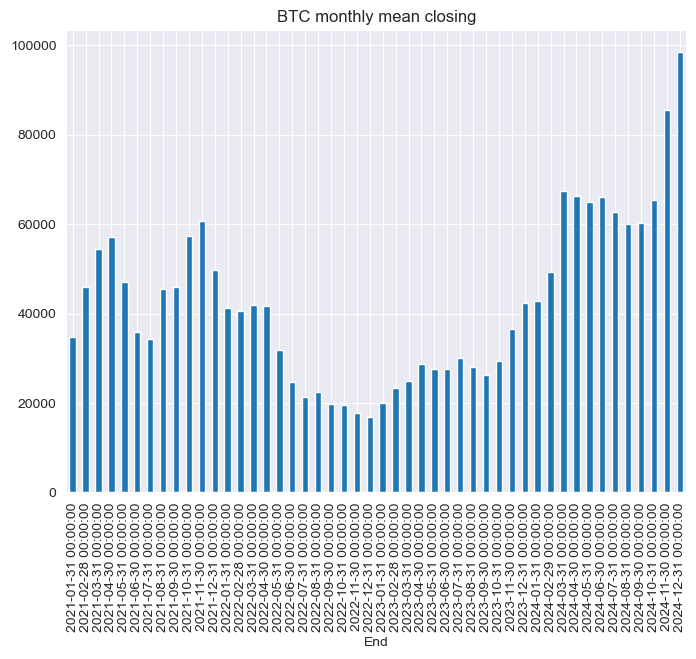

In [19]:
# Monthly
plt.rcParams['figure.figsize'] = (8, 6)
closing_btc_dates['Close'].resample('ME').mean().plot(kind='bar')
plt.title('BTC monthly mean closing')

<Axes: xlabel='End'>

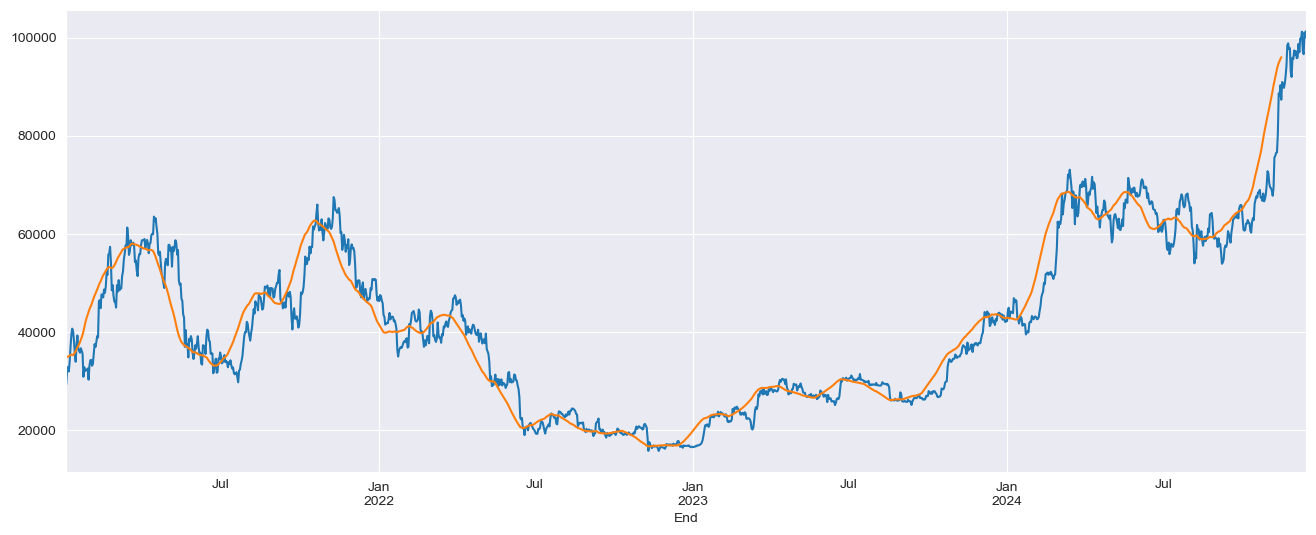

In [20]:
closing_btc_dates['Close'].plot()
closing_btc_dates['Close'].rolling(window=30).mean().plot(figsize=(16, 6))

# Machine learning

In [21]:
ml_features = ['End', 'Close']
ml_btc = closing_btc[ml_features]
ml_btc.set_index('End', inplace=True)
ml_btc

,Close
End,
2024-12-14,101371.000000
2024-12-13,100041.000000
2024-12-12,101074.000000
2024-12-11,96628.010000
2024-12-10,97422.430000
...,...
2021-01-06,33965.160423
2021-01-05,31973.832154
2021-01-04,32877.607283


In [22]:
# Reverses the dataset to train the ML model properly
ml_btc = ml_btc.iloc[::-1]
ml_btc

,Close
End,
2021-01-02,29300.190936
2021-01-03,32093.264962
2021-01-04,32877.607283
2021-01-05,31973.832154
2021-01-06,33965.160423
...,...
2024-12-10,97422.430000
2024-12-11,96628.010000
2024-12-12,101074.000000


In [23]:
# Creates the training and validation set: 80/20
train_len = math.ceil(len(ml_btc) * 0.8)
print(train_len)

train_data = ml_btc[:train_len]
val_data = ml_btc[train_len:]
print(f"training datasets: {train_data.shape}, validation dataset: {val_data.shape}")


1155
training datasets: (1155, 1), validation dataset: (288, 1)


In [24]:
# Scaling the training and validation set
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data)
scaled_val = scaler.fit_transform(val_data)

In [25]:
# To make the time series a supervised learning example. It creates blocks of 50 closing values where each column is a gliding window of the previous one. E.g. Column 0 starts from Close values from 0 until 49, Column 1 starts from Close values from 1 until 50, Column 3 starts from Close values from 3 until 51, and so on --> ‼️It's the way to create a training sert for time series
x_train = []
y_train = []
for i in range (50, len(scaled_train)):
    x_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(x_train)
        print(y_train)
        print()

[array([0.26141155, 0.31541525, 0.3305804 , 0.31310603, 0.35160808,
       0.40843436, 0.45849057, 0.48188889, 0.47078507, 0.43540265,
       0.38263207, 0.3513033 , 0.41723392, 0.45484707, 0.40407883,
       0.39439651, 0.38682183, 0.40477282, 0.39438312, 0.38391568,
       0.29220447, 0.32977855, 0.31449828, 0.31867277, 0.31888622,
       0.32478306, 0.28084604, 0.3352201 , 0.35694502, 0.3587223 ,
       0.33557908, 0.34287416, 0.38142181, 0.42095786, 0.4090882 ,
       0.42857637, 0.45265878, 0.44680284, 0.58865997, 0.5941902 ,
       0.56238401, 0.6167908 , 0.61567217, 0.60473252, 0.63598848,
       0.62262128, 0.64735199, 0.70277672, 0.69367437, 0.77368798])]
[0.7778185321550241]

[array([0.26141155, 0.31541525, 0.3305804 , 0.31310603, 0.35160808,
       0.40843436, 0.45849057, 0.48188889, 0.47078507, 0.43540265,
       0.38263207, 0.3513033 , 0.41723392, 0.45484707, 0.40407883,
       0.39439651, 0.38682183, 0.40477282, 0.39438312, 0.38391568,
       0.29220447, 0.32977855, 0.314

In [61]:
scaled_train[52-50:52, 0]

array([0.3305804 , 0.31310603, 0.35160808, 0.40843436, 0.45849057,
       0.48188889, 0.47078507, 0.43540265, 0.38263207, 0.3513033 ,
       0.41723392, 0.45484707, 0.40407883, 0.39439651, 0.38682183,
       0.40477282, 0.39438312, 0.38391568, 0.29220447, 0.32977855,
       0.31449828, 0.31867277, 0.31888622, 0.32478306, 0.28084604,
       0.3352201 , 0.35694502, 0.3587223 , 0.33557908, 0.34287416,
       0.38142181, 0.42095786, 0.4090882 , 0.42857637, 0.45265878,
       0.44680284, 0.58865997, 0.5941902 , 0.56238401, 0.6167908 ,
       0.61567217, 0.60473252, 0.63598848, 0.62262128, 0.64735199,
       0.70277672, 0.69367437, 0.77368798, 0.77781853, 0.80409768])

In [26]:
x_val = []
y_val = []
for i in range (50, len(scaled_val)):
    x_val.append(scaled_val[i-50:i, 0])
    y_val.append(scaled_val[i, 0])
    if i <= 51:
        print(x_val)
        print(y_val)
        print()

[array([0.18037288, 0.17031878, 0.19341696, 0.30107873, 0.21177546,
       0.2574264 , 0.27358482, 0.30096303, 0.30751163, 0.31670373,
       0.38298005, 0.36990098, 0.40391883, 0.36902698, 0.32897898,
       0.23949931, 0.31038823, 0.29060818, 0.16983678, 0.29361082,
       0.24349629, 0.20327274, 0.2174018 , 0.28081395, 0.33677294,
       0.34010245, 0.32892988, 0.35364919, 0.33568818, 0.33198436,
       0.36448709, 0.3331747 , 0.24290997, 0.25609927, 0.30640811,
       0.29518622, 0.31575786, 0.3259559 , 0.37322902, 0.32194059,
       0.34966296, 0.34120007, 0.28000001, 0.21777926, 0.24574674,
       0.20178228, 0.20563636, 0.15569129, 0.2001192 , 0.21166756])]
[0.23046780159971947]

[array([0.18037288, 0.17031878, 0.19341696, 0.30107873, 0.21177546,
       0.2574264 , 0.27358482, 0.30096303, 0.30751163, 0.31670373,
       0.38298005, 0.36990098, 0.40391883, 0.36902698, 0.32897898,
       0.23949931, 0.31038823, 0.29060818, 0.16983678, 0.29361082,
       0.24349629, 0.20327274, 0.21

In [27]:
x_train_df = pd.DataFrame(x_train)
y_train_s = pd.Series(y_train)

x_val_df = pd.DataFrame(x_val)
y_val_s = pd.Series(y_val)

In [28]:
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.261412,0.315415,0.330580,0.313106,0.351608,0.408434,0.458491,0.481889,0.470785,0.435403,...,0.562384,0.616791,0.615672,0.604733,0.635988,0.622621,0.647352,0.702777,0.693674,0.773688
1,0.315415,0.330580,0.313106,0.351608,0.408434,0.458491,0.481889,0.470785,0.435403,0.382632,...,0.616791,0.615672,0.604733,0.635988,0.622621,0.647352,0.702777,0.693674,0.773688,0.777819
2,0.330580,0.313106,0.351608,0.408434,0.458491,0.481889,0.470785,0.435403,0.382632,0.351303,...,0.615672,0.604733,0.635988,0.622621,0.647352,0.702777,0.693674,0.773688,0.777819,0.804098
3,0.313106,0.351608,0.408434,0.458491,0.481889,0.470785,0.435403,0.382632,0.351303,0.417234,...,0.604733,0.635988,0.622621,0.647352,0.702777,0.693674,0.773688,0.777819,0.804098,0.741950
4,0.351608,0.408434,0.458491,0.481889,0.470785,0.435403,0.382632,0.351303,0.417234,0.454847,...,0.635988,0.622621,0.647352,0.702777,0.693674,0.773688,0.777819,0.804098,0.741950,0.632915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0.544505,0.542739,0.601702,0.585887,0.595209,0.591202,0.524286,0.523202,0.501893,0.518782,...,0.698150,0.702667,0.694006,0.702611,0.695270,0.705687,0.697080,0.687538,0.677688,0.691591
1101,0.542739,0.601702,0.585887,0.595209,0.591202,0.524286,0.523202,0.501893,0.518782,0.528948,...,0.702667,0.694006,0.702611,0.695270,0.705687,0.697080,0.687538,0.677688,0.691591,0.695359
1102,0.601702,0.585887,0.595209,0.591202,0.524286,0.523202,0.501893,0.518782,0.528948,0.521746,...,0.694006,0.702611,0.695270,0.705687,0.697080,0.687538,0.677688,0.691591,0.695359,0.747775
1103,0.585887,0.595209,0.591202,0.524286,0.523202,0.501893,0.518782,0.528948,0.521746,0.493367,...,0.702611,0.695270,0.705687,0.697080,0.687538,0.677688,0.691591,0.695359,0.747775,0.797549


In [29]:
y_train_s

0       0.777819
1       0.804098
2       0.741950
3       0.632915
4       0.653474
          ...   
1100    0.695359
1101    0.747775
1102    0.797549
1103    0.903273
1104    0.879273
Length: 1105, dtype: float64

In [30]:
x_val_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.180373,0.170319,0.193417,0.301079,0.211775,0.257426,0.273585,0.300963,0.307512,0.316704,...,0.349663,0.341200,0.280000,0.217779,0.245747,0.201782,0.205636,0.155691,0.200119,0.211668
1,0.170319,0.193417,0.301079,0.211775,0.257426,0.273585,0.300963,0.307512,0.316704,0.382980,...,0.341200,0.280000,0.217779,0.245747,0.201782,0.205636,0.155691,0.200119,0.211668,0.230468
2,0.193417,0.301079,0.211775,0.257426,0.273585,0.300963,0.307512,0.316704,0.382980,0.369901,...,0.280000,0.217779,0.245747,0.201782,0.205636,0.155691,0.200119,0.211668,0.230468,0.231287
3,0.301079,0.211775,0.257426,0.273585,0.300963,0.307512,0.316704,0.382980,0.369901,0.403919,...,0.217779,0.245747,0.201782,0.205636,0.155691,0.200119,0.211668,0.230468,0.231287,0.271795
4,0.211775,0.257426,0.273585,0.300963,0.307512,0.316704,0.382980,0.369901,0.403919,0.369027,...,0.245747,0.201782,0.205636,0.155691,0.200119,0.211668,0.230468,0.231287,0.271795,0.262684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.317505,0.284886,0.283915,0.270249,0.301620,0.267978,0.277762,0.297306,0.336572,0.397488,...,0.915965,0.895992,0.912859,0.882748,0.886190,0.944360,0.908172,0.966858,0.964783,0.996712
234,0.284886,0.283915,0.270249,0.301620,0.267978,0.277762,0.297306,0.336572,0.397488,0.388574,...,0.895992,0.912859,0.882748,0.886190,0.944360,0.908172,0.966858,0.964783,0.996712,0.916782
235,0.283915,0.270249,0.301620,0.267978,0.277762,0.297306,0.336572,0.397488,0.388574,0.346004,...,0.912859,0.882748,0.886190,0.944360,0.908172,0.966858,0.964783,0.996712,0.916782,0.900039
236,0.270249,0.301620,0.267978,0.277762,0.297306,0.336572,0.397488,0.388574,0.346004,0.328974,...,0.882748,0.886190,0.944360,0.908172,0.966858,0.964783,0.996712,0.916782,0.900039,0.993741


In [31]:
y_val_s

0      0.230468
1      0.231287
2      0.271795
3      0.262684
4      0.218520
         ...   
233    0.916782
234    0.900039
235    0.993741
236    0.971970
237    1.000000
Length: 238, dtype: float64

In [32]:
# Trains the model
regressor = LinearRegression().fit(x_train_df, y_train_s)
print(regressor.score(x_train_df, y_train_s))

0.9910155162613222


In [33]:
# Make predictions using the model on the validation set
y_pred = regressor.predict(x_val_df)
y_pred.flatten()

array([ 0.24268547,  0.21731197,  0.23037417,  0.27573184,  0.28461755,
        0.20613852,  0.21746161,  0.21312783,  0.19442488,  0.18888129,
        0.2140611 ,  0.15526215,  0.08893761,  0.10507306,  0.19819751,
        0.19829304,  0.21703733,  0.20810761,  0.19075625,  0.13287628,
        0.17335682,  0.15380247,  0.14567215,  0.16421044,  0.18562258,
        0.15237639,  0.25150908,  0.25832041,  0.28305024,  0.27675475,
        0.24824427,  0.37461397,  0.34123752,  0.32213732,  0.29791679,
        0.30181306,  0.31529488,  0.29596294,  0.33152354,  0.32281999,
        0.2929725 ,  0.29557477,  0.28718601,  0.3055791 ,  0.28152053,
        0.31182974,  0.3624969 ,  0.36587549,  0.3425679 ,  0.33931642,
        0.33253804,  0.32351595,  0.33797154,  0.28422143,  0.3016826 ,
        0.27539039,  0.26754461,  0.26333963,  0.28056339,  0.25521466,
        0.23657754,  0.22940278,  0.23584344,  0.22399522,  0.20814719,
        0.20319582,  0.13300523,  0.17036797,  0.14044447,  0.15

In [35]:
# Reverse scaling validation values
y_val_df = pd.DataFrame(y_val_s)
y_val_df = scaler.inverse_transform(y_val_df)
y_val_df.flatten()

array([ 64857.99,  64896.87,  66818.89,  66386.61,  64291.07,  64495.27,
        63806.23,  63483.13,  63059.25,  63817.97,  60761.95,  58266.04,
        59134.5 ,  62799.97,  63880.04,  64040.05,  63197.19,  62380.43,
        61220.05,  63110.01,  60887.95,  60784.24,  61549.96,  62917.18,
        61602.22,  66247.62,  65249.97,  67004.04,  66914.58,  66347.05,
        71418.17,  70104.4 ,  69224.99,  67923.97,  68534.95,  69264.99,
        68552.6 ,  69446.22,  68397.44,  67665.53,  68375.98,  67576.21,
        67747.95,  67781.47,  68808.7 ,  70599.  ,  71131.93,  70783.1 ,
        69375.8 ,  69316.65,  69657.34,  69519.27,  67345.04,  68270.22,
        66771.55,  66052.46,  66198.06,  66661.05,  66491.14,  65098.92,
        64950.06,  64881.08,  64097.29,  64272.8 ,  63290.43,  60382.81,
        61789.98,  60761.24,  61646.05,  60427.86,  60964.17,  62849.53,
        62889.92,  62127.95,  60294.75,  57142.  ,  56691.34,  58232.99,
        55878.38,  56681.81,  57995.99,  57719.47, 

In [36]:
# Reverse scaling predicted values
y_pred_df = pd.DataFrame(y_pred)
y_pred_orginal = scaler.inverse_transform(y_pred_df)
y_pred_orginal.flatten()

array([ 65437.69801591,  64233.7676902 ,  64853.54713062,  67005.69260528,
        67427.30477115,  63703.60644777,  64240.86807581,  64035.23768936,
        63147.81371962,  62884.78003758,  64079.51961876,  61289.60827226,
        58142.6201553 ,  58908.22013483,  63326.81899891,  63331.3516553 ,
        64220.73683571,  63797.03626711,  62973.74354454,  60227.43615592,
        62148.17007021,  61220.34886017,  60834.5789941 ,  61714.18938853,
        62730.15959509,  61152.68355759,  65856.36326802,  66179.54937886,
        67352.93844313,  67054.22809896,  65701.45363251,  71697.48341984,
        70113.82719086,  69207.55450463,  68058.33124888,  68243.20274782,
        68882.89218884,  67965.62432181,  69652.91484085,  69239.9462568 ,
        67823.73301427,  67947.20639105,  67549.17346522,  68421.89487438,
        67280.35623219,  68718.4774505 ,  71122.54873456,  71282.85735375,
        70176.95141354,  70022.67421142,  69701.05125373,  69272.96828132,
        69958.86185994,  

In [42]:
# Checks the RMSE
rmse = root_mean_squared_error(y_val_df, y_pred_orginal)
rmse

1821.7276936234555

In [43]:
# Putting in the same dataframe the actual and predicted values
ml_df = pd.DataFrame({'actual': y_val_df.flatten(), 'predicted': y_pred_orginal.flatten()})
ml_dfb

,actual,predicted
0,64857.99,65437.698016
1,64896.87,64233.767690
2,66818.89,64853.547131
3,66386.61,67005.692605
4,64291.07,67427.304771
...,...,...
233,97422.43,101867.406809
234,96628.01,97757.537091
235,101074.00,96804.766392
236,100041.00,100925.088077


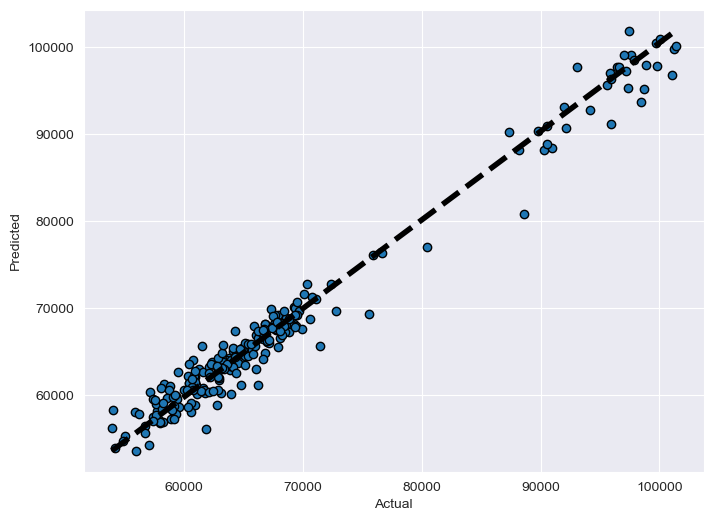

In [49]:
# Visualizing actual and predicted values.The predictions are quite near to actual
fig, ax = plt.subplots()
ax.scatter(y_val_df, y_pred_orginal, edgecolors=(0, 0, 0))
ax.plot([y_val_df.min(), y_val_df.max()], [y_pred_orginal.min(), y_pred_orginal.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

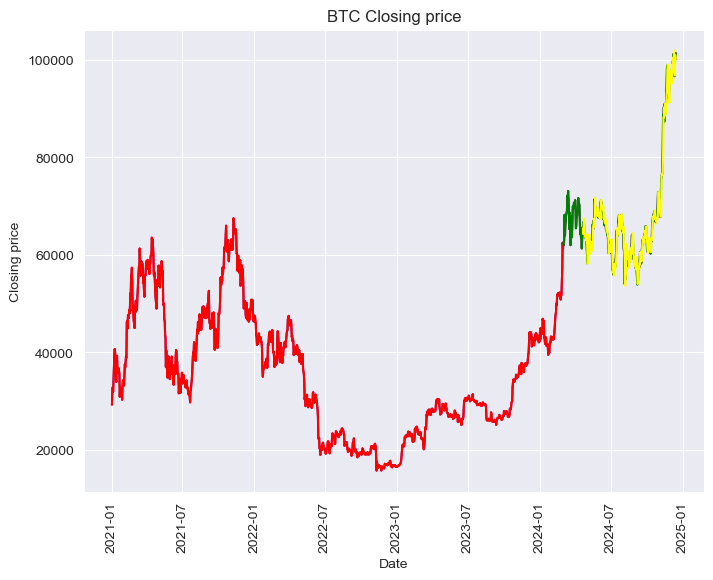

In [55]:
# Superposing actual and predicted values in the time series
plt.plot(closing_btc['End'], closing_btc.Close, color='purple')
plt.plot(train_data.index, train_data.Close, color='red')
plt.plot(val_data.index, val_data.Close, color='green')
plt.plot(val_data[50:].index, y_pred_orginal.ravel(), color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('BTC Closing price')
plt.show()